In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [25]:
pd.set_option('display.max_column',None)

In [4]:
data = pd.read_csv('eda_data.csv')

In [14]:
df=data.copy()

In [8]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

In [23]:
df_dum=pd.get_dummies(df_model)

In [27]:
from sklearn.model_selection import train_test_split

In [40]:
X=df_dum.drop('avg_salary',axis=1)
y=df_dum['avg_salary']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import cross_val_score

In [105]:
lm=LinearRegression()
lm_l=Lasso()
display(np.mean(cross_val_score(lm,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv=3))

-20.76685512891771

-21.0941474114959

In [42]:
alpha=[]
error=[]

In [44]:
for i in range(1,100):
    alpha.append(i/100)
    lm_l=Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))
    

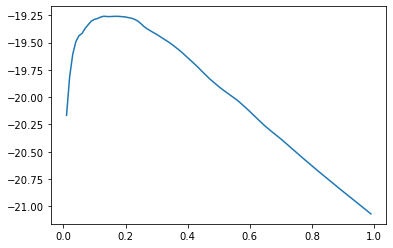

In [45]:
plt.plot(alpha,error)

In [73]:
err=tuple(zip(alpha,error))
df_err=pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error==max(df_err.error)]

,alpha,error
111,0.13,-19.257798


In [74]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-15.09217457997915

In [101]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100], 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}#'n_estimators':range(70,150,10)
gs=GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)

In [102]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': [100]},
             scoring='neg_mean_absolute_error')

In [103]:
display(gs.best_score_)
gs.best_estimator_

-14.979357534738247

RandomForestRegressor()

In [112]:
lm=LinearRegression()
lm.fit(X_train,y_train)
lm_l=Lasso(alpha=.13)
lm_l.fit(X_train,y_train)

Lasso(alpha=0.13)

In [113]:
tpred_lm=lm.predict(X_test)
tpred_lm_l=lm_l.predict(X_test)
tpred_rf=gs.best_estimator_.predict(X_test)

In [109]:
from sklearn.metrics import mean_absolute_error

In [114]:
display(mean_absolute_error(y_test,tpred_lm))
display(mean_absolute_error(y_test,tpred_lm_l))
mean_absolute_error(y_test,tpred_rf)

18.8551899902153

19.665303712749914

11.263456375838928